In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import altair as alt
from pyensembl import EnsemblRelease



/pollard/data/projects/sdrusinsky/pollard_lab/variant_modeling/lib/python3.6/site-packages/requests/__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.0.0)/charset_normalizer (2.0.7) doesn't match a supported version!
  RequestsDependencyWarning)


## The 456 DNVs significant in all models have more genes nearby than other random samples of 456 DNVs

In [3]:
all_bootstrap_gene_results = pd.read_csv("BootstrapDNVResults_CanonicalGenes.csv") #computed using HPC


data = EnsemblRelease(107)
enrichment_window = 100000 #looking for genes within 100kb of each sig DNV

#compute test statistic for the 456 significant DNVs in all models
num_nearby_genes = 0
all_model_dnv = pd.read_csv("DNVs_sig_in_all_models.vcf",sep='\t',skiprows=2) # only DNVs sig in all models
all_model_dnv['POS'] = all_model_dnv['POS'].astype(int)
all_model_dnv = all_model_dnv.reset_index()
for dnv_idx,dnv in all_model_dnv.iterrows():
    chrom = dnv['#CHROM'].split('chr')[1]
    pos = dnv['POS'] #this is the position of the variant
    #count how many genes are within 1Mb of this dnv (according to Ensembl)

    # num_nearby_genes += knownCanonicalGenes[(knownCanonicalGenes['chr']==chrom) & 
    #                                          ((knownCanonicalGenes['start']>=(pos - enrichment_window)) & 
    #                                           (knownCanonicalGenes['start']<=(pos + enrichment_window))) |

    #                                           ((knownCanonicalGenes['end']>=(pos - enrichment_window)) & 
    #                                           (knownCanonicalGenes['end']<=(pos + enrichment_window)))].shape[0]
    nearby_genes = data.genes_at_locus(contig = chrom, position = pos - enrichment_window,end = pos + enrichment_window) #use this because if the gene is long, start and end 
    for nearby_gene in nearby_genes:
        if nearby_gene.biotype == 'protein_coding':
            num_nearby_genes +=1

all_bootstrap_gene_results = all_bootstrap_gene_results.append({'bootstrap_nearby_gene_counts':num_nearby_genes,'bootstrap_idx':'sig_DNVs_in_all_models','enrichment_window':enrichment_window},ignore_index=True)


experimental_gene_results = all_bootstrap_gene_results[all_bootstrap_gene_results['bootstrap_idx']=='sig_DNVs_in_all_models']
bootstrap_gene_results = all_bootstrap_gene_results[all_bootstrap_gene_results['bootstrap_idx']!='sig_DNVs_in_all_models']


/pollard/data/projects/sdrusinsky/pollard_lab/variant_modeling/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


INFO:numexpr.utils:Note: NumExpr detected 48 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.


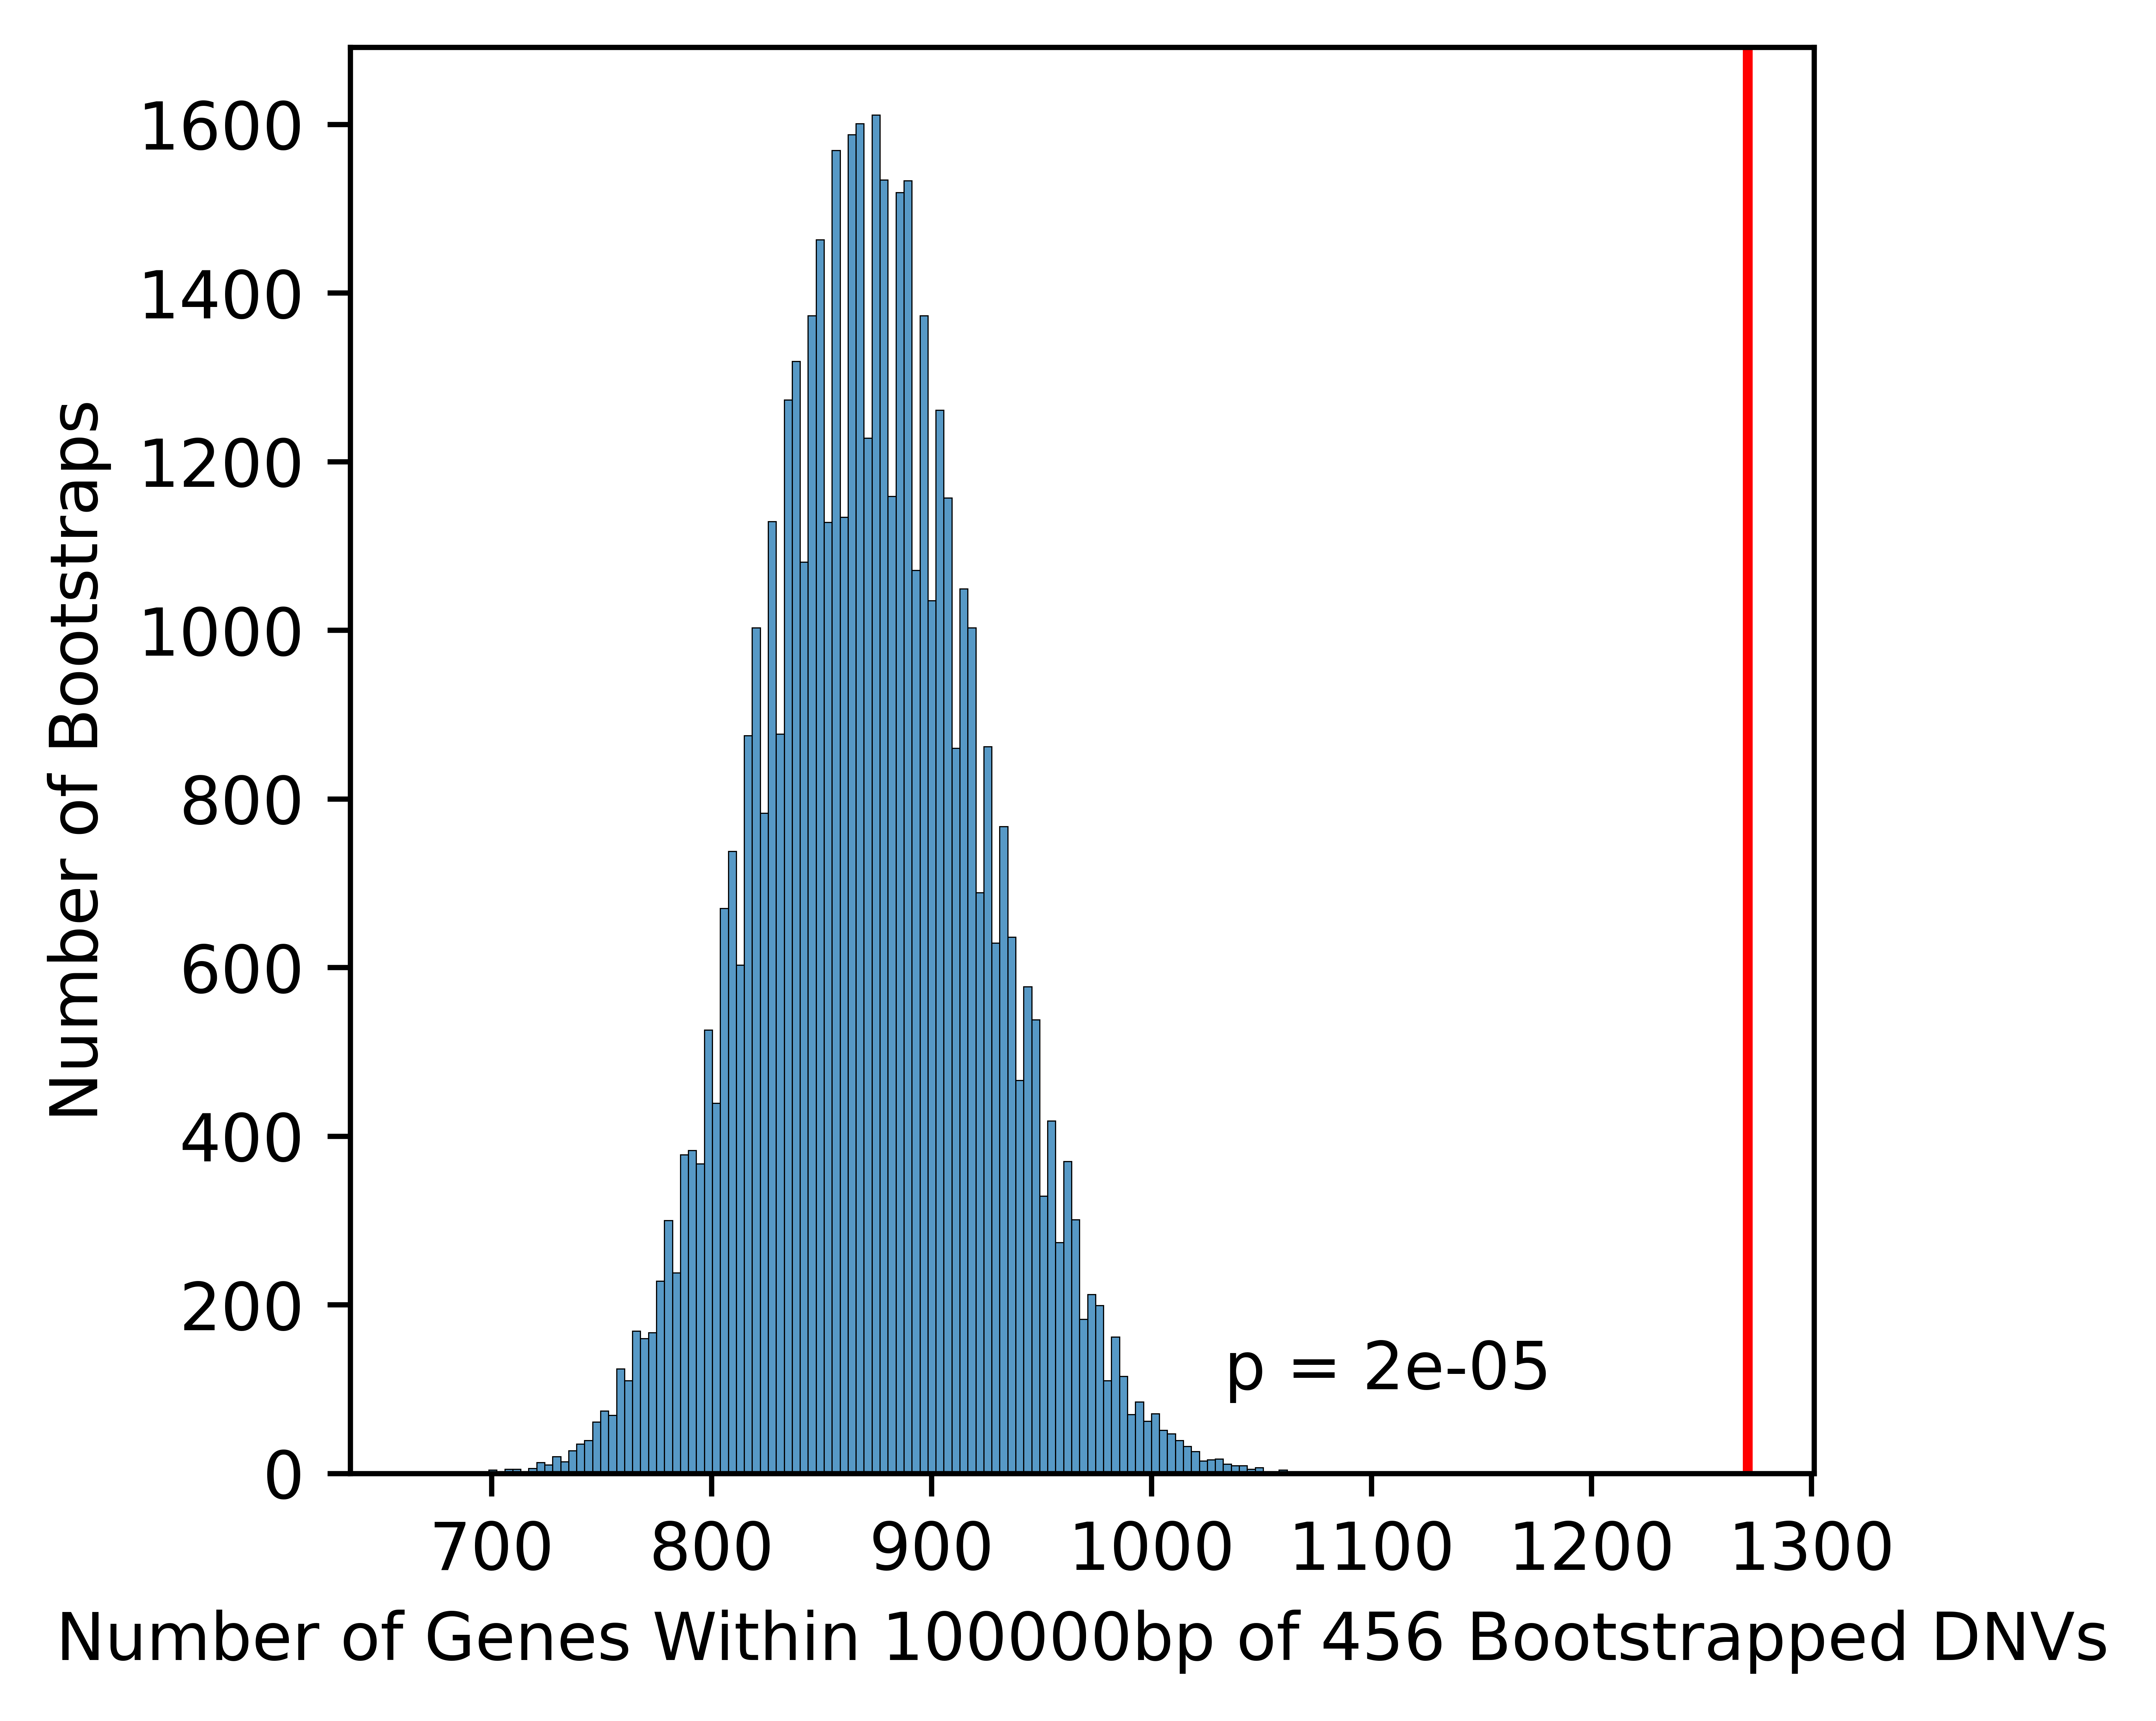

In [4]:
num_total_bootstraps = 50000


num_genes_near_sig_dnvs = experimental_gene_results[experimental_gene_results['enrichment_window']==enrichment_window]['bootstrap_nearby_gene_counts'].values[0]
plt.figure(figsize=(4,4),dpi = 1200)

sns.histplot(bootstrap_gene_results[bootstrap_gene_results['enrichment_window']==enrichment_window]['bootstrap_nearby_gene_counts'])
plt.axvline(num_genes_near_sig_dnvs,color='red')
plt.xlabel(f"Number of Genes Within {enrichment_window}bp of 456 Bootstrapped DNVs")
plt.ylabel("Number of Bootstraps")
pval = (bootstrap_gene_results[(bootstrap_gene_results['bootstrap_nearby_gene_counts']>=num_genes_near_sig_dnvs) &
                              (bootstrap_gene_results['enrichment_window']==enrichment_window)].shape[0]+1)/(num_total_bootstraps+1)

x_pos = np.percentile(bootstrap_gene_results[bootstrap_gene_results['enrichment_window']==enrichment_window]['bootstrap_nearby_gene_counts'],99.9)

plt.text(x = x_pos, y = 100, s = f"p = {round(pval,8)}")
plt.show()

# Are the 456 DNVs significant in all models are enriched near genes associated with CHD according to Richter 2020 Supplementary Table 5.

In [5]:
bootstrapped_results = pd.read_csv("BootstrapDNVResults_RichterGenes.csv")


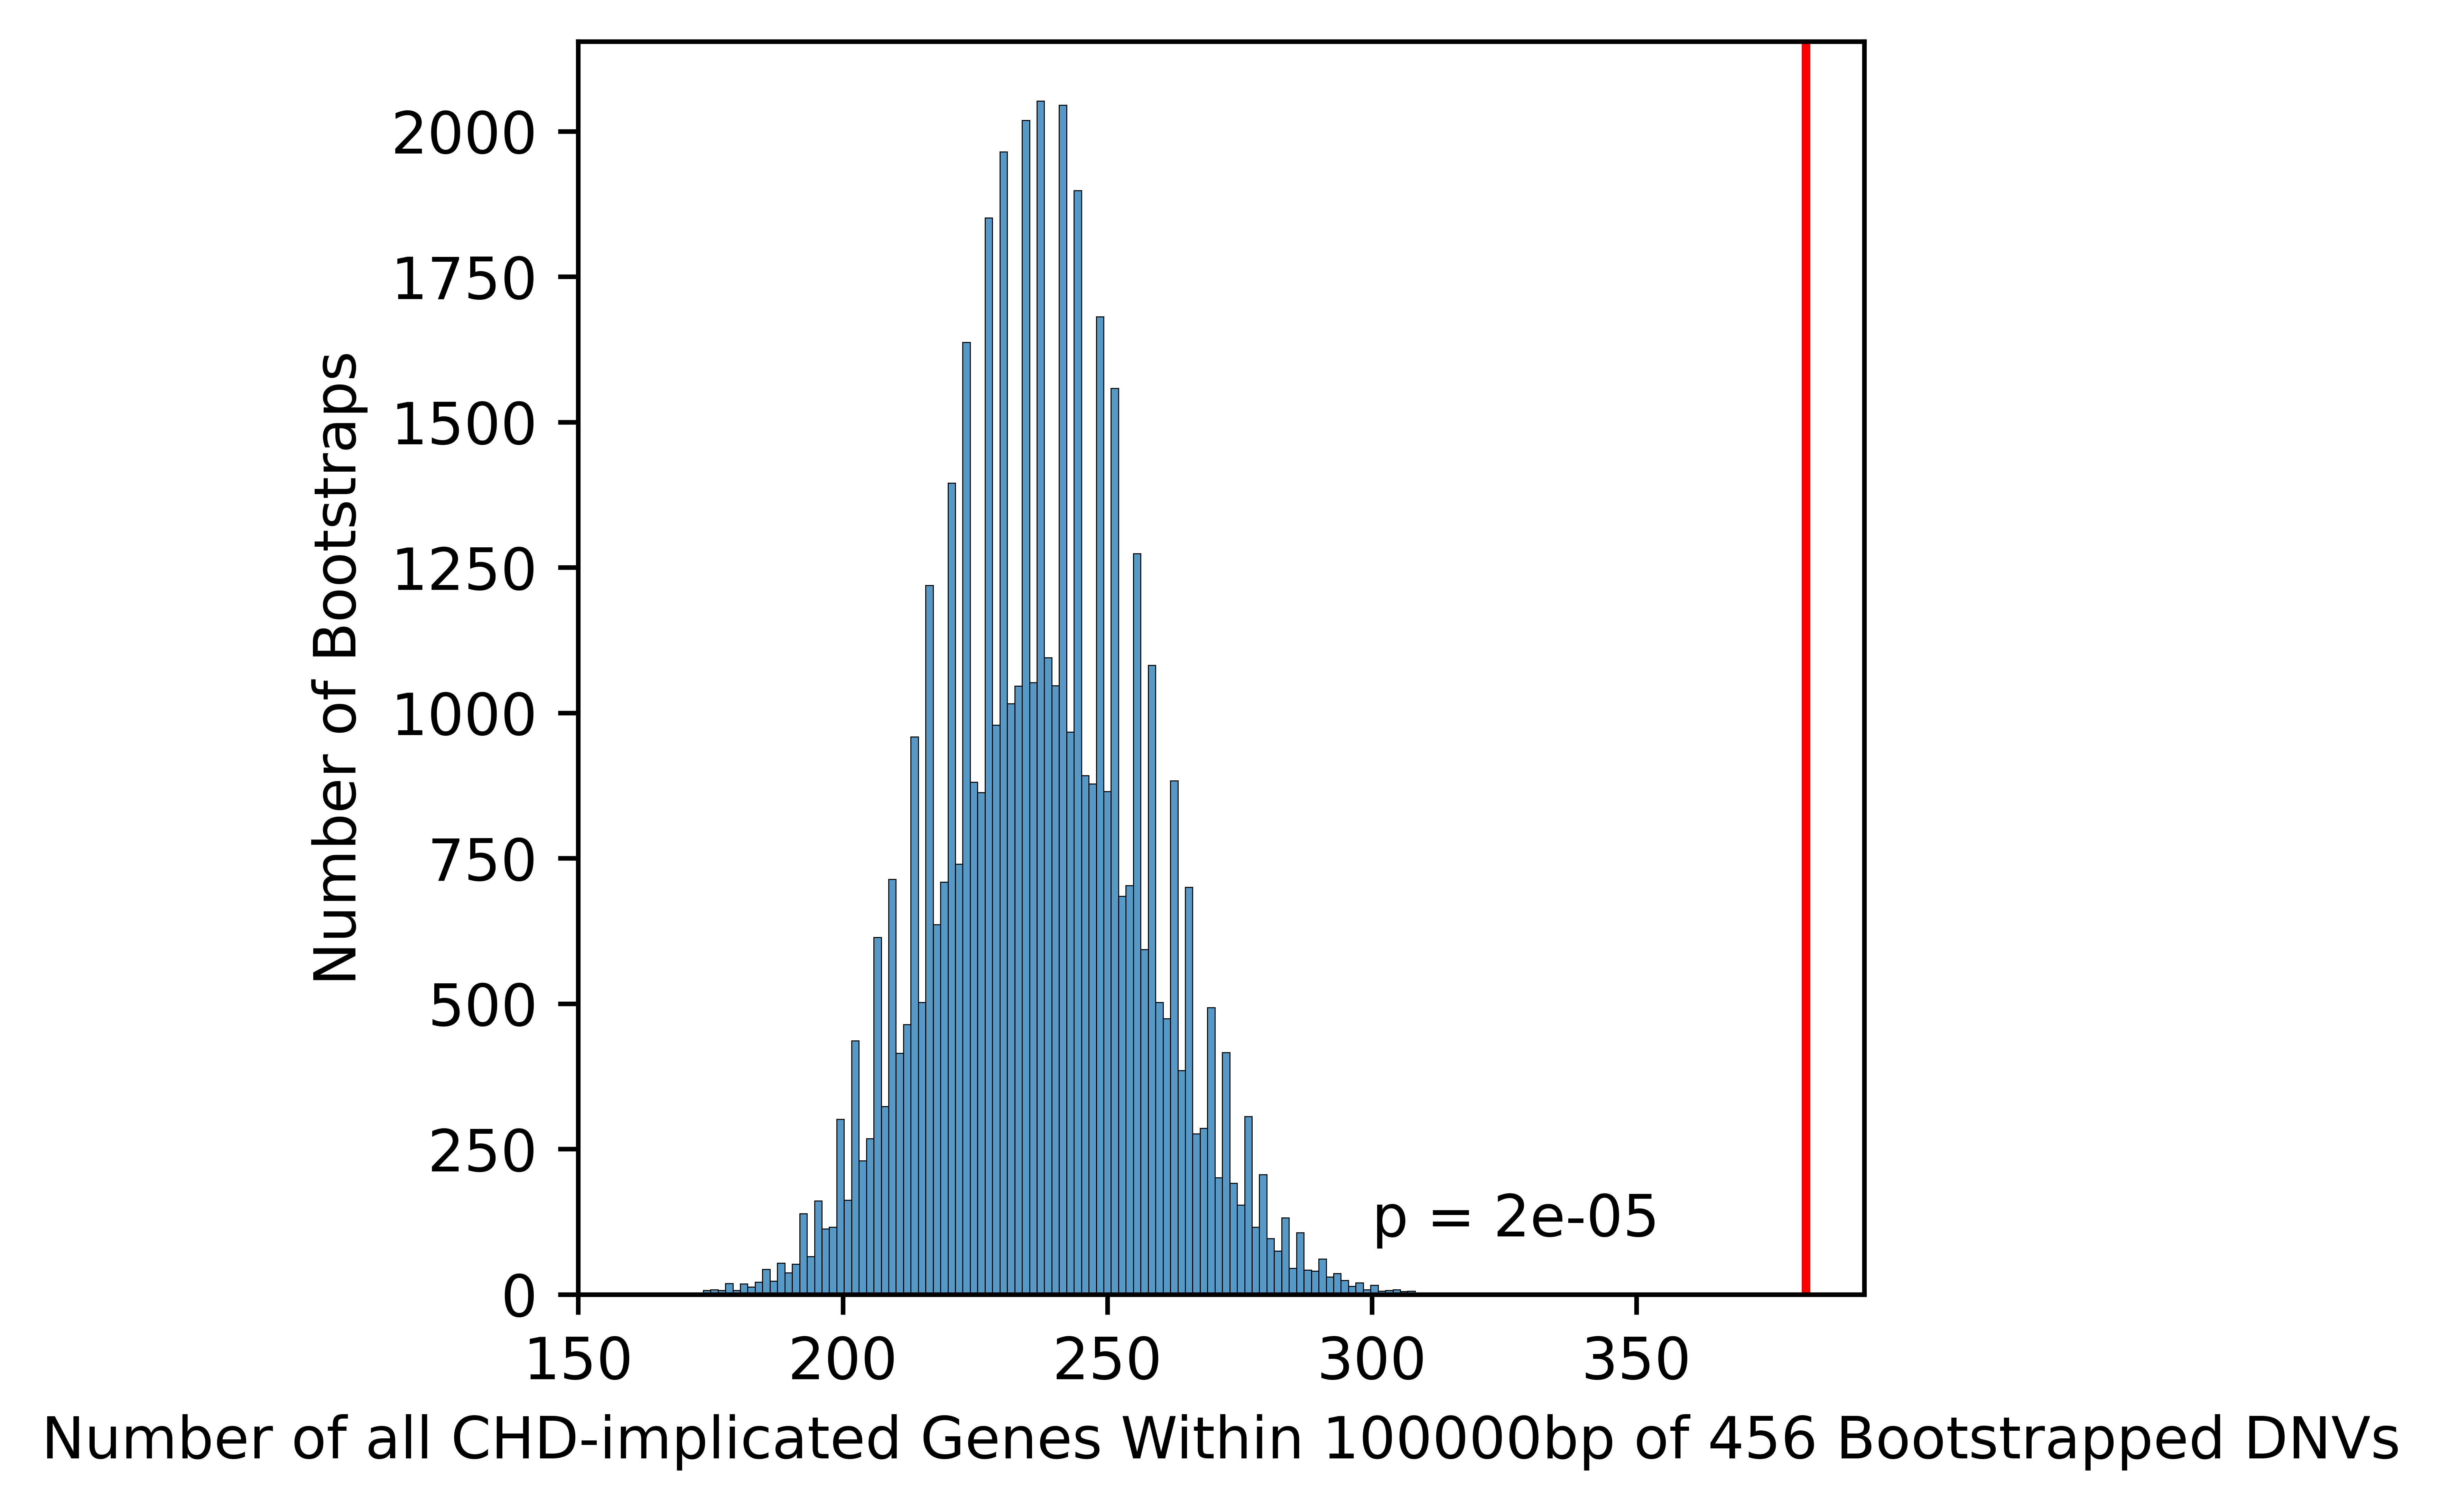

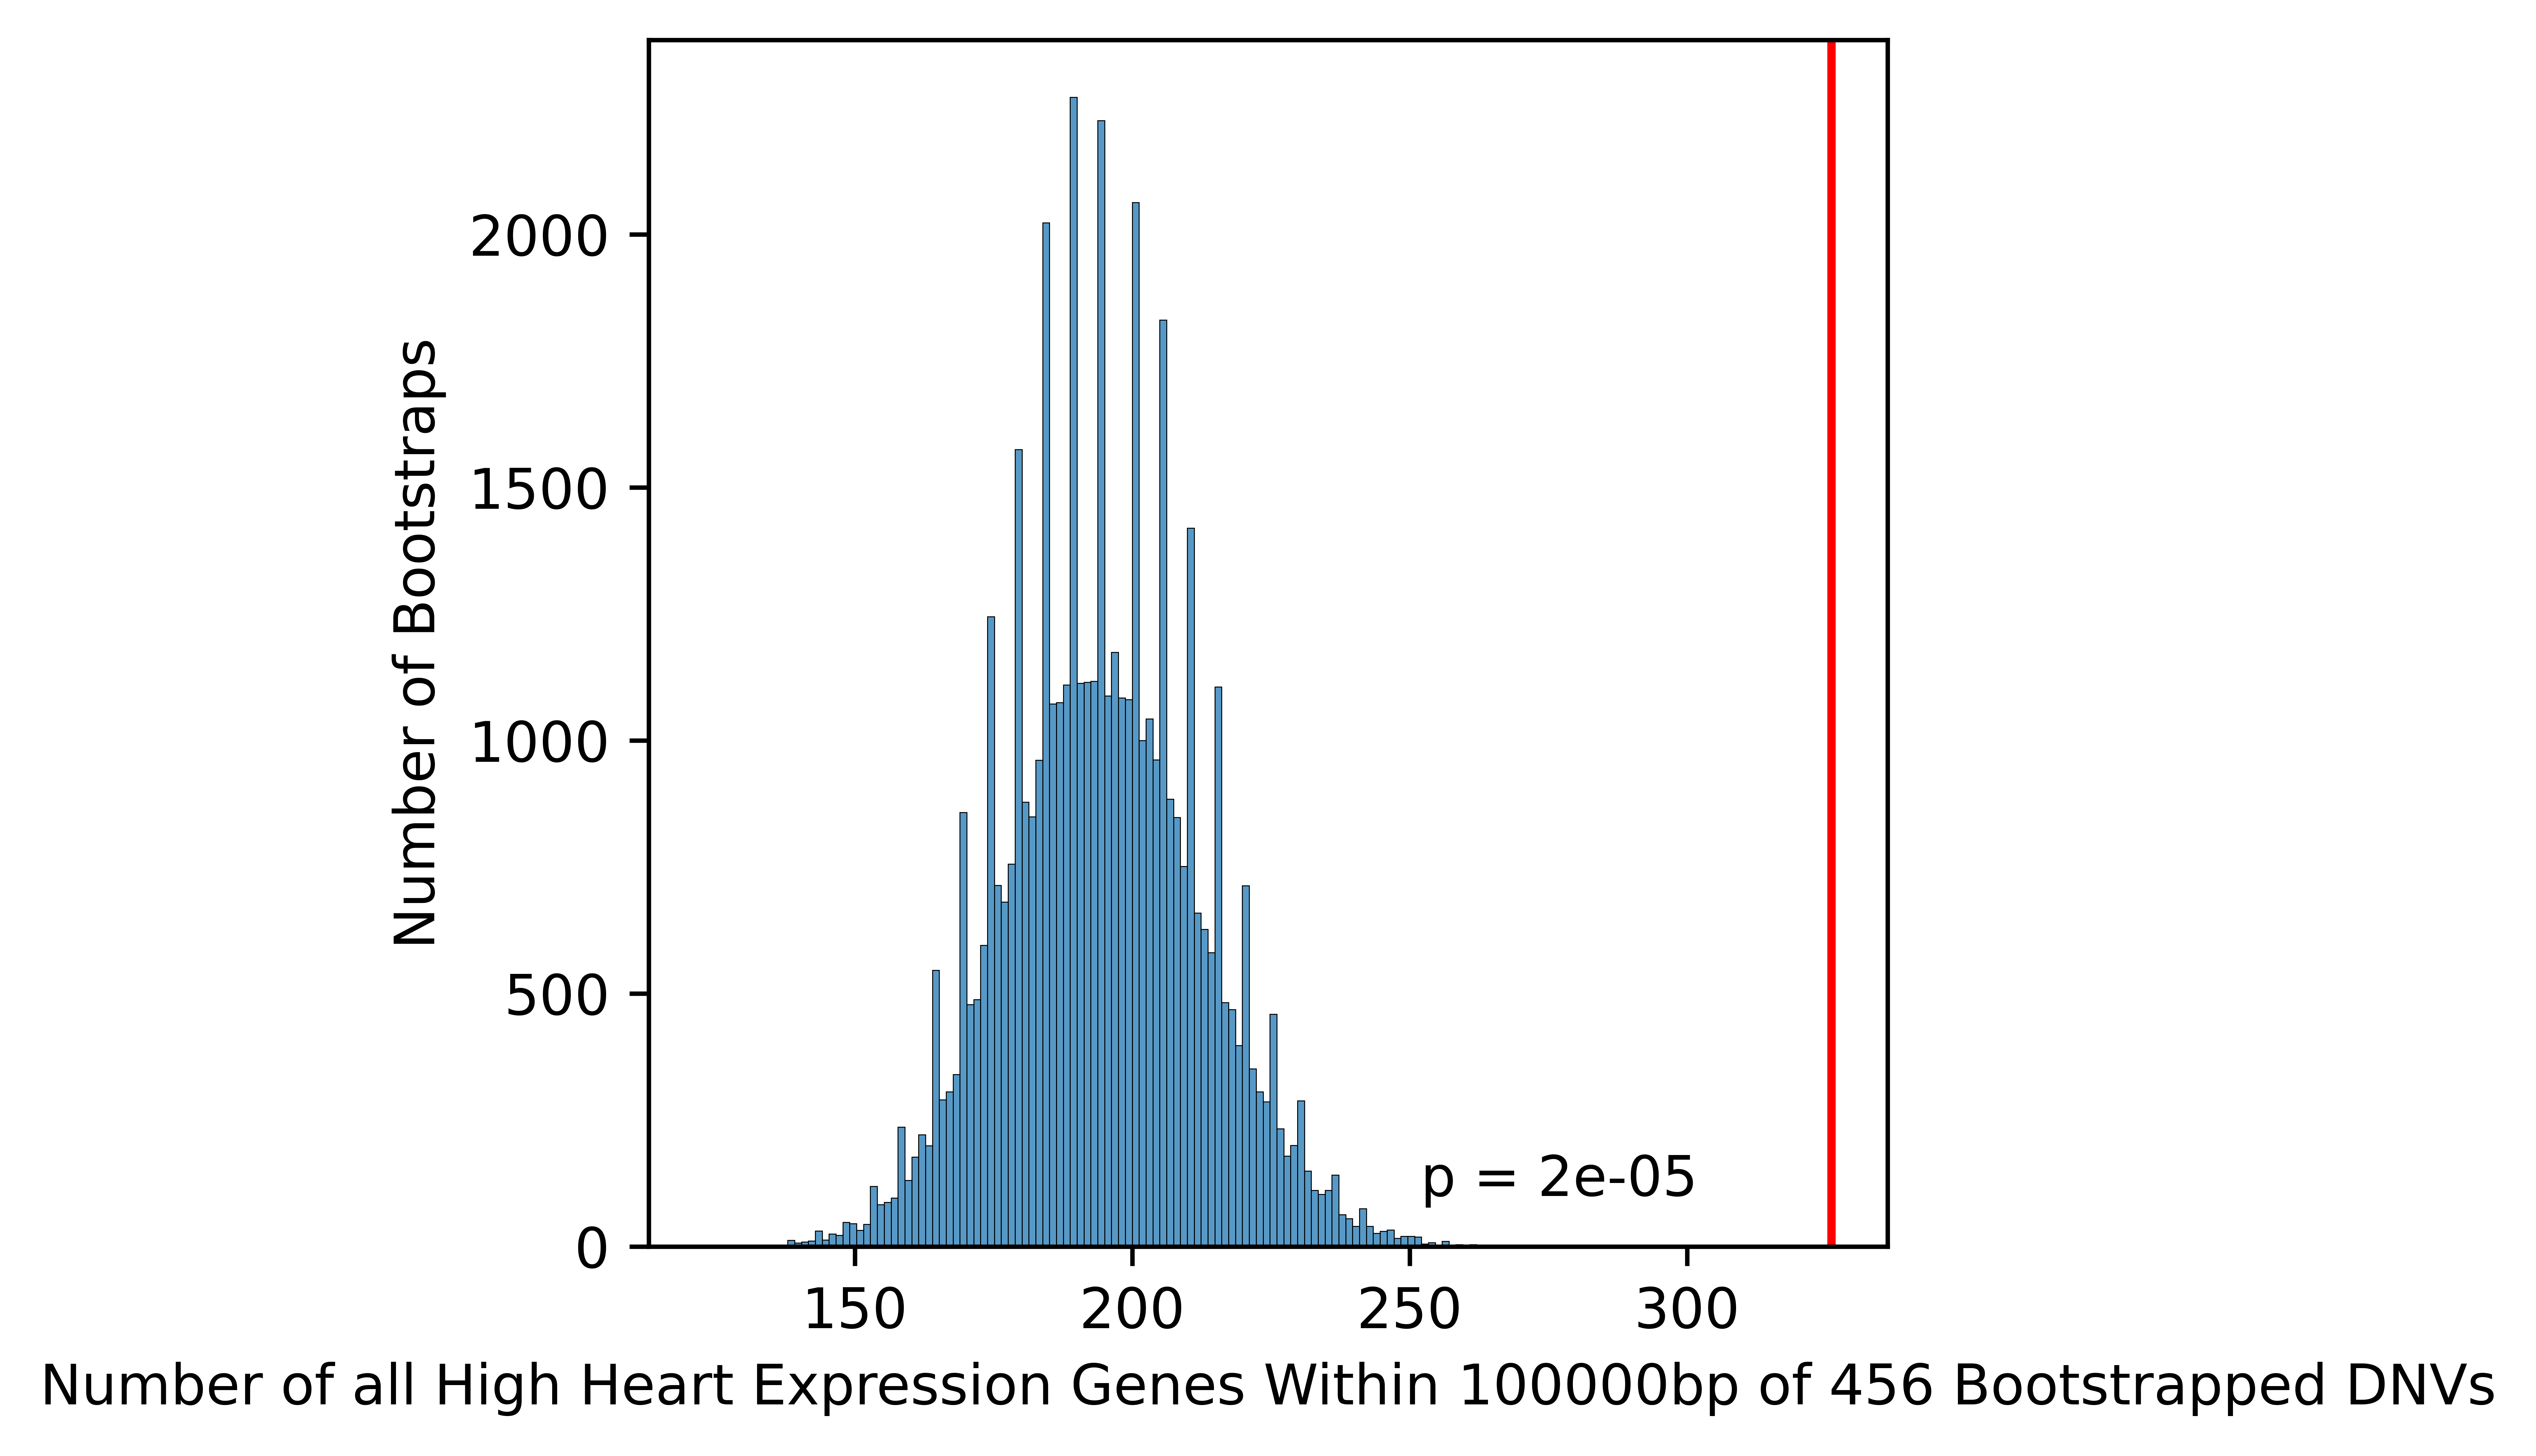

In [6]:
num_total_bootstraps = 50000

enrichment_window = 100000
experimental_gene_results = bootstrapped_results[bootstrapped_results['bootstrap_idx']=='sig_DNVs_in_all_models']
bootstrap_gene_results = bootstrapped_results[bootstrapped_results['bootstrap_idx']!='sig_DNVs_in_all_models']

#plot bootstrap results all CHD-implicated genes from Richter 2020 supplementary table
num_genes_near_sig_dnvs = experimental_gene_results[experimental_gene_results['enrichment_window']==enrichment_window]['bootstrap_nearby_all_richter_gene_counts'].values[0]
plt.figure(figsize=(4,4),dpi = 1200)

sns.histplot(bootstrap_gene_results[bootstrap_gene_results['enrichment_window']==enrichment_window]['bootstrap_nearby_all_richter_gene_counts'])
plt.axvline(num_genes_near_sig_dnvs,color='red')
plt.xlabel(f"Number of all CHD-implicated Genes Within {enrichment_window}bp of 456 Bootstrapped DNVs")
plt.ylabel("Number of Bootstraps")
pval = (bootstrap_gene_results[(bootstrap_gene_results['bootstrap_nearby_all_richter_gene_counts']>=num_genes_near_sig_dnvs) &
                              (bootstrap_gene_results['enrichment_window']==enrichment_window)].shape[0]+1)/(num_total_bootstraps+1)

x_pos = np.percentile(bootstrap_gene_results[bootstrap_gene_results['enrichment_window']==enrichment_window]['bootstrap_nearby_all_richter_gene_counts'],99.9)

plt.text(x = x_pos, y = 100, s = f"p = {round(pval,8)}")
plt.show()

    
#plot bootstrap results all high heart expression genes from Richter 2020 supplementary table

num_genes_near_sig_dnvs = experimental_gene_results[experimental_gene_results['enrichment_window']==enrichment_window]['bootstrap_nearby_richter_hhe_gene_counts'].values[0]
plt.figure(figsize=(4,4),dpi = 1200)

sns.histplot(bootstrap_gene_results[bootstrap_gene_results['enrichment_window']==enrichment_window]['bootstrap_nearby_richter_hhe_gene_counts'])
plt.axvline(num_genes_near_sig_dnvs,color='red')
plt.xlabel(f"Number of all High Heart Expression Genes Within {enrichment_window}bp of 456 Bootstrapped DNVs")
plt.ylabel("Number of Bootstraps")
pval = (bootstrap_gene_results[(bootstrap_gene_results['bootstrap_nearby_richter_hhe_gene_counts']>=num_genes_near_sig_dnvs) &
                              (bootstrap_gene_results['enrichment_window']==enrichment_window)].shape[0]+1)/(num_total_bootstraps+1)

x_pos = np.percentile(bootstrap_gene_results[bootstrap_gene_results['enrichment_window']==enrichment_window]['bootstrap_nearby_richter_hhe_gene_counts'],99.9)

plt.text(x = x_pos, y = 100, s = f"p = {round(pval,8)}")
plt.show()

### Am I seeing more CHD genes nearby just because these variants are near lots of genes?

In [7]:

from pyensembl import EnsemblRelease
data = EnsemblRelease(107) #### NOTE: I am using Ensembl API to find genes near DNV positions. some genes in the Richter 2020 dataset do not appear in Ensembl 




chd_genes_df = pd.read_excel("RichterSupplementalTables.xlsx",sheet_name="S5 CHD gene lists",skiprows=1,engine='openpyxl')
chd_genes_df = chd_genes_df.drop(chd_genes_df.tail(2).index) #drop last two rows that don't contain any information

#define high heart expression genes from Richter 2020
hhe_genes = list(chd_genes_df['HHE Genes (4420)'].unique())

#define all CHD genes from Richter 2020
all_chd_genes = chd_genes_df.to_numpy().flatten()
all_chd_genes = list(all_chd_genes[~pd.isnull(all_chd_genes)]) #remove nans 
all_chd_genes = [str(x) for x in all_chd_genes] #coerce all genes to be strings
all_chd_genes = list(np.unique(all_chd_genes)) #remove duplicate genes

#compute test statistic for the 456 significant DNVs in al models
enrichment_window = 100000

all_model_dnv = pd.read_csv("DNVs_sig_in_all_models.vcf",sep='\t',skiprows=2) # only DNVs sig in all models
all_model_dnv['POS'] = all_model_dnv['POS'].astype(int)
all_model_dnv = all_model_dnv.reset_index()
all_model_dnv['num_nearby_genes'] = 0
all_model_dnv['num_nearby_CHD_genes'] = 0
all_model_dnv['num_nearby_HHE_genes'] = 0

for dnv_idx,dnv in all_model_dnv.iterrows():
    num_nearby_genes = 0
    num_nearby_richter_hhe_genes=0
    num_nearby_all_richter_genes=0
    chrom = dnv['#CHROM'].split('chr')[1]
    pos = dnv['POS'] #this is the position of the variant
  #count how many of the sig cardiovascular dsease GWAS variants are within 1Mb of this dnv

  # num_nearby_genes += knownCanonicalGenes[(knownCanonicalGenes['chr']==chrom) & 
  #                                          ((knownCanonicalGenes['start']>=(pos - enrichment_window)) & 
  #                                           (knownCanonicalGenes['start']<=(pos + enrichment_window))) |

  #                                           ((knownCanonicalGenes['end']>=(pos - enrichment_window)) & 
  #                                           (knownCanonicalGenes['end']<=(pos + enrichment_window)))].shape[0]
    nearby_genes = data.genes_at_locus(contig = chrom, position = pos - enrichment_window,end = pos + enrichment_window) #use this because if the gene is long, start and end 
    for nearby_gene in nearby_genes:
        if nearby_gene.gene_name in all_chd_genes:
            num_nearby_all_richter_genes +=1
        if nearby_gene.gene_name in hhe_genes:
            num_nearby_richter_hhe_genes +=1
        if nearby_gene.biotype == 'protein_coding':
            num_nearby_genes +=1
    all_model_dnv.loc[dnv_idx,'num_nearby_genes']=num_nearby_genes
    all_model_dnv.loc[dnv_idx,'num_nearby_CHD_genes']=num_nearby_all_richter_genes
    all_model_dnv.loc[dnv_idx,'num_nearby_HHE_genes']=num_nearby_richter_hhe_genes


/pollard/data/projects/sdrusinsky/pollard_lab/variant_modeling/lib/python3.6/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [8]:

condlist = [all_model_dnv['num_nearby_CHD_genes'] == 0,
            ((all_model_dnv['num_nearby_CHD_genes']>=1) & (all_model_dnv['num_nearby_CHD_genes'] <3)),
            (all_model_dnv['num_nearby_CHD_genes']>=3)]
choicelist = ['0','1,2','>3']
all_model_dnv['nearby_CHD_bins'] = np.select(condlist, choicelist, np.nan)

condlist = [all_model_dnv['num_nearby_genes'] < 3,
            ((all_model_dnv['num_nearby_genes']>=3) & (all_model_dnv['num_nearby_genes'] <=5)),
            (all_model_dnv['num_nearby_genes']>5)]
choicelist = ['<3','3-5','>6']
all_model_dnv['nearby_all_gene_bins'] = np.select(condlist, choicelist, np.nan)


<AxesSubplot:xlabel='nearby_CHD_genes', ylabel='count'>

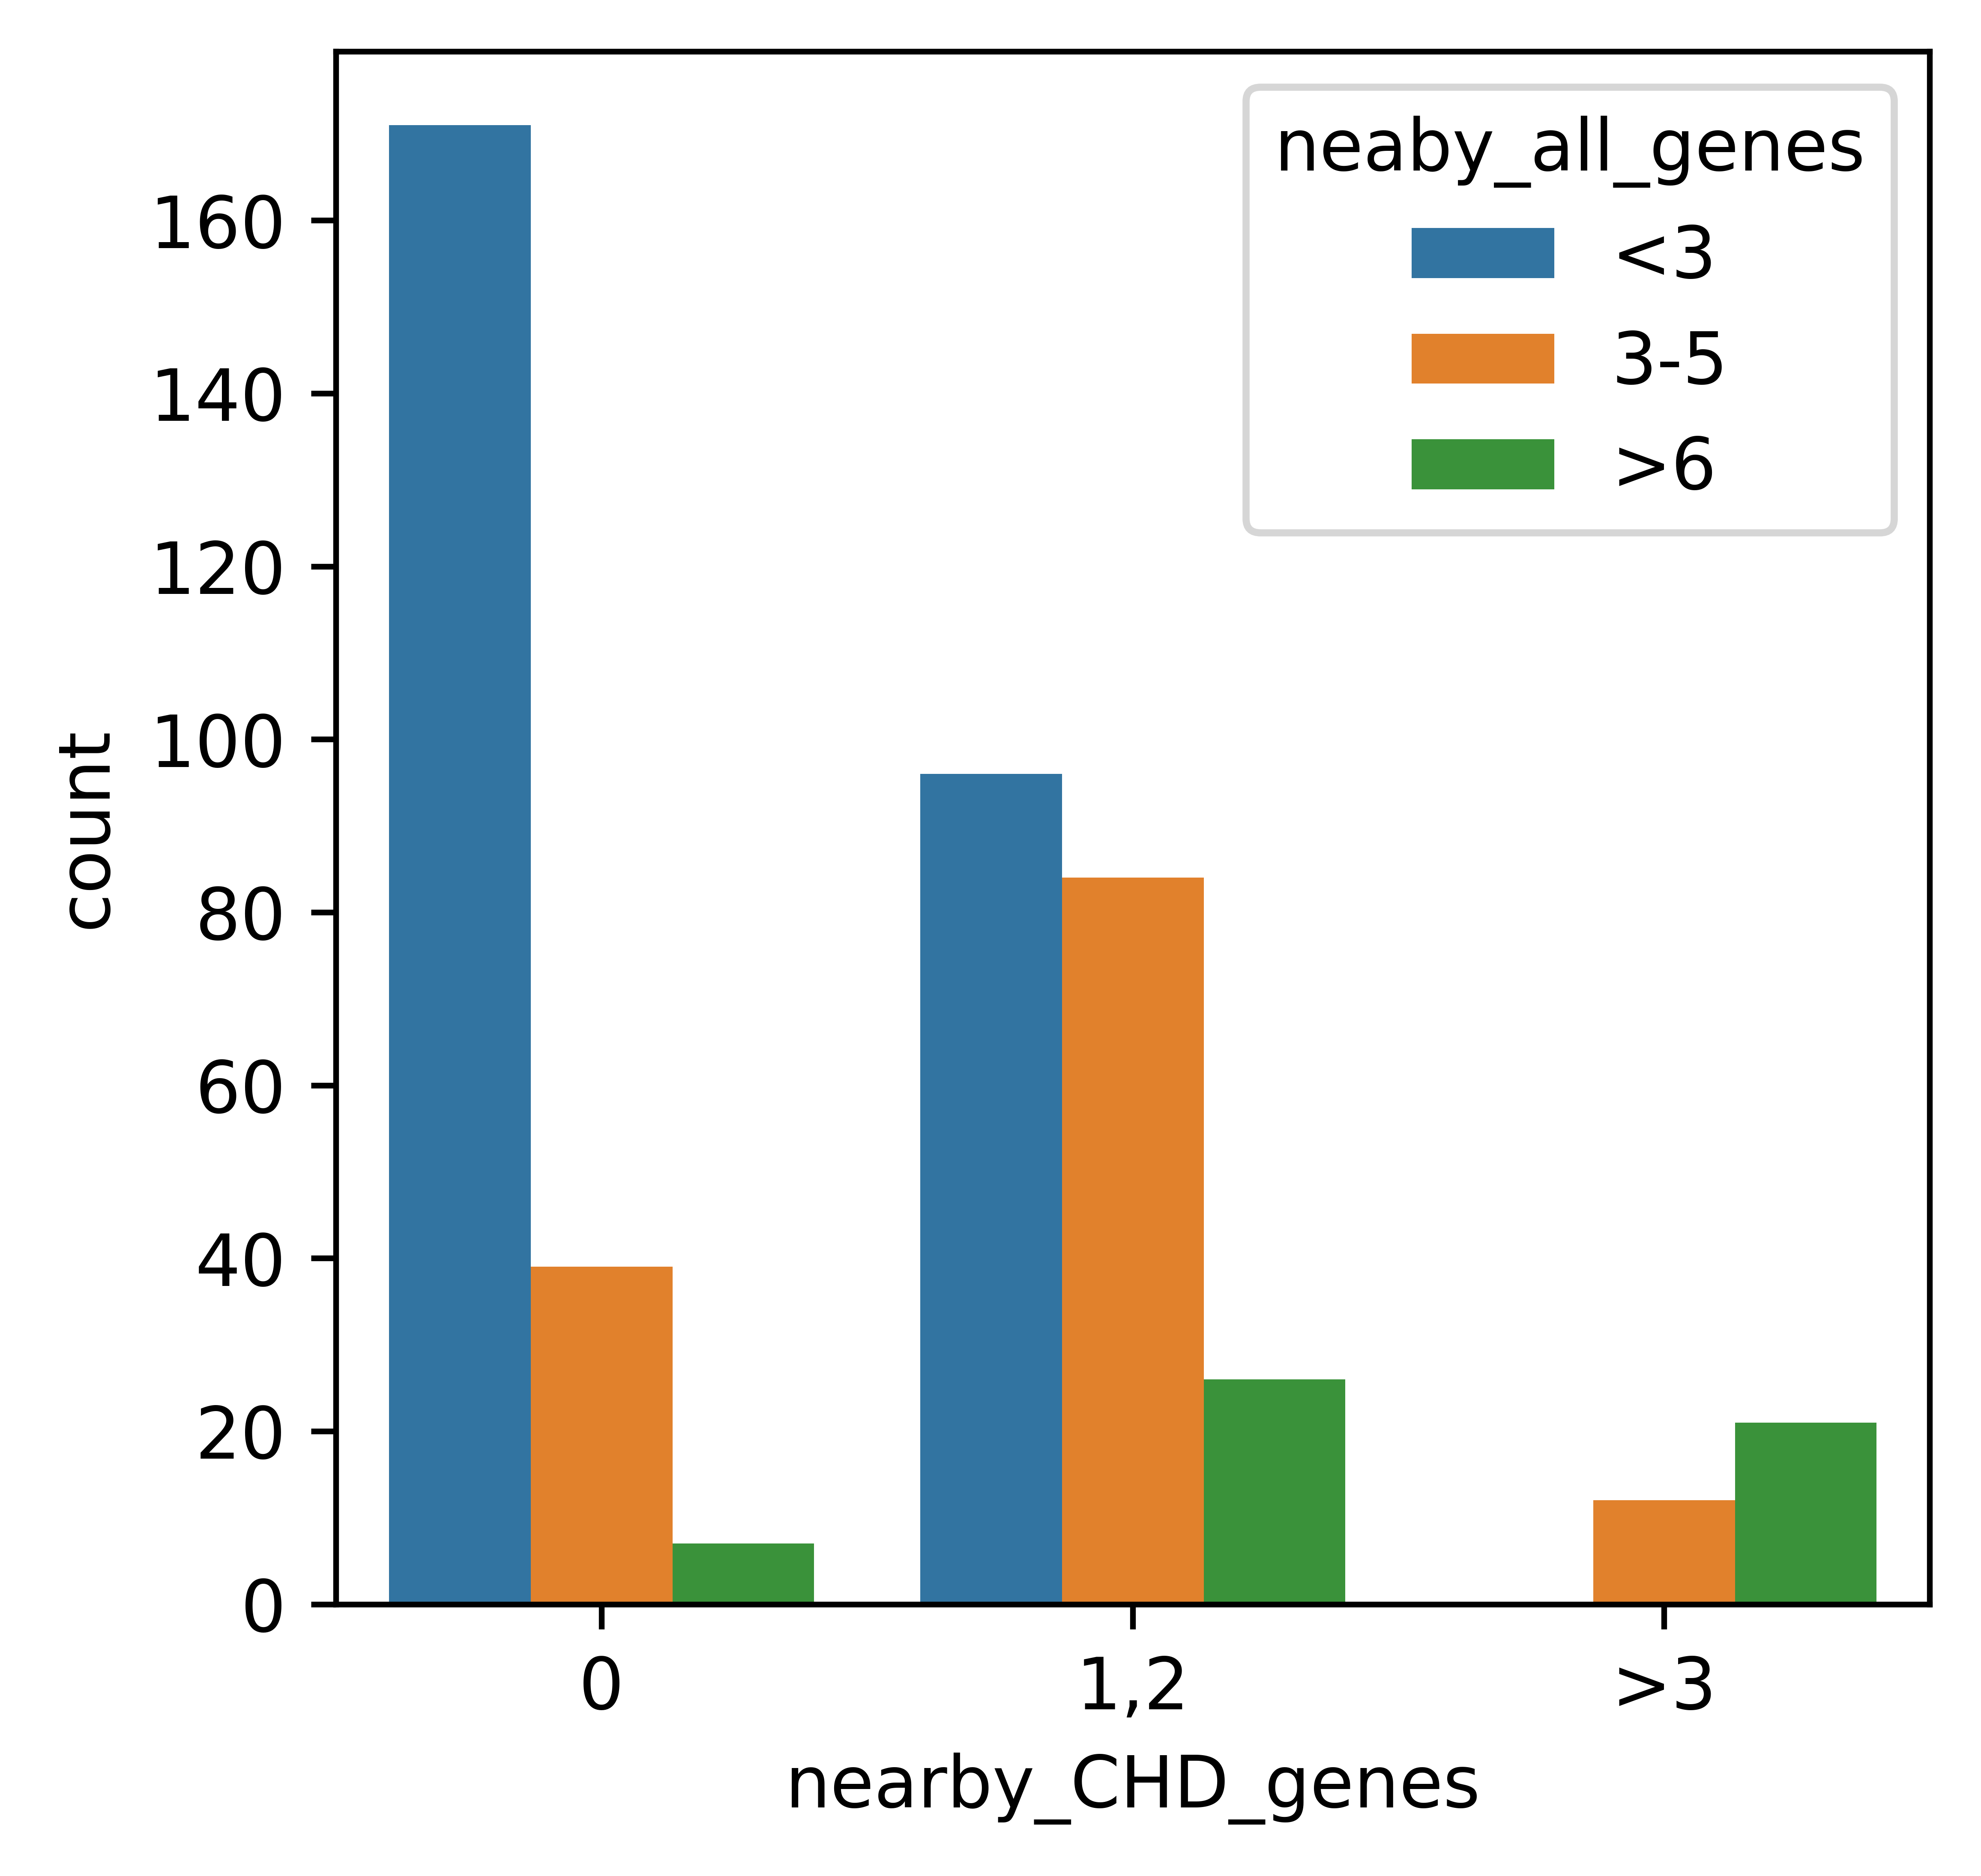

In [9]:
plot_df = all_model_dnv.groupby(['nearby_CHD_bins','nearby_all_gene_bins'])['ALT'].count().reset_index().rename(columns = {'ALT':'count'})
hue_order = ['<3', '3-5', '>6']
data = plot_df.rename(columns = {'nearby_CHD_bins':'nearby_CHD_genes',
                                 'nearby_all_gene_bins':'neaby_all_genes'})
plt.figure(figsize=(4,4),dpi = 1200)
sns.barplot(data = data,y = 'count',x = 'nearby_CHD_genes',hue = 'neaby_all_genes',hue_order = hue_order)